In [2]:
import pandas as pd

# Load the dataset using the same path as in your original notebook
df = pd.read_csv("../data/combined_v4.csv")

# Confirm the columns
print(df.columns.tolist())


['ticker', 'category', 'event_ticker', 'late_volume_ratio', 'abs_price_jump', 'yes_flow_ratio', 'price_std_1h', 'vol_total', 'vol_5m', 'vol_10m', 'vol_30m', 'vol_1h', 'price_change_5m', 'price_change_10m', 'price_change_30m', 'last_minute_ratio', 'burstiness', 'velocity_price_change', 'direction_agreement', 'relative_volatility', 'momentum_alignment', 'is_yes', 'inter_dir_burst', 'inter_dir_last', 'vol_1m', 'vol_3m', 'price_change_1m', 'price_change_3m', 'ratio_vol_1m_30m', 'ratio_vol_3m_30m', 'accel_ratio', 'price_momentum_diff', 'burstiness_dev', 'vol_surge_3m', 'price_vol_1m_interaction']


In [ ]:
df_sports = df[df["category"] == "Sports"].copy()
print(len(df_sports))
df_sports.head()



396


,ticker,category,event_ticker,late_volume_ratio,abs_price_jump,yes_flow_ratio,price_std_1h,vol_total,vol_5m,vol_10m,...,vol_3m,price_change_1m,price_change_3m,ratio_vol_1m_30m,ratio_vol_3m_30m,accel_ratio,price_momentum_diff,burstiness_dev,vol_surge_3m,price_vol_1m_interaction
0,KXNCAAMBTOTAL-25NOV08PVWICH-152,Sports,KXNCAAMBTOTAL-25NOV08PVWICH,0.0,0.0,1.0,0.0,200,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.216261,0.0,0.0
1,KXNCAAMBTOTAL-25NOV08PVWICH-149,Sports,KXNCAAMBTOTAL-25NOV08PVWICH,0.0,0.0,1.0,0.0,200,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.216261,0.0,0.0
2,KXNCAAMBTOTAL-25NOV08PVWICH-146,Sports,KXNCAAMBTOTAL-25NOV08PVWICH,0.0,0.0,1.0,0.0,200,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.216261,0.0,0.0
3,KXNCAAMBTOTAL-25NOV08PVWICH-143,Sports,KXNCAAMBTOTAL-25NOV08PVWICH,0.0,0.0,1.0,0.0,200,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.216261,0.0,0.0
4,KXNCAAMBTOTAL-25NOV08PVWICH-140,Sports,KXNCAAMBTOTAL-25NOV08PVWICH,0.0,0.0,0.0,0.0,200,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.216261,0.0,0.0


In [4]:
df_sports.info()
df_sports.head(3)


<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 467
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ticker                    396 non-null    object 
 1   category                  396 non-null    object 
 2   event_ticker              396 non-null    object 
 3   late_volume_ratio         396 non-null    float64
 4   abs_price_jump            396 non-null    float64
 5   yes_flow_ratio            396 non-null    float64
 6   price_std_1h              396 non-null    float64
 7   vol_total                 396 non-null    int64  
 8   vol_5m                    396 non-null    int64  
 9   vol_10m                   396 non-null    int64  
 10  vol_30m                   396 non-null    int64  
 11  vol_1h                    396 non-null    int64  
 12  price_change_5m           396 non-null    float64
 13  price_change_10m          396 non-null    float64
 14  price_change_30

,ticker,category,event_ticker,late_volume_ratio,abs_price_jump,yes_flow_ratio,price_std_1h,vol_total,vol_5m,vol_10m,...,vol_3m,price_change_1m,price_change_3m,ratio_vol_1m_30m,ratio_vol_3m_30m,accel_ratio,price_momentum_diff,burstiness_dev,vol_surge_3m,price_vol_1m_interaction
0,KXNCAAMBTOTAL-25NOV08PVWICH-152,Sports,KXNCAAMBTOTAL-25NOV08PVWICH,0.0,0.0,1.0,0.0,200,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.216261,0.0,0.0
1,KXNCAAMBTOTAL-25NOV08PVWICH-149,Sports,KXNCAAMBTOTAL-25NOV08PVWICH,0.0,0.0,1.0,0.0,200,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.216261,0.0,0.0
2,KXNCAAMBTOTAL-25NOV08PVWICH-146,Sports,KXNCAAMBTOTAL-25NOV08PVWICH,0.0,0.0,1.0,0.0,200,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.216261,0.0,0.0


In [12]:
from sklearn.model_selection import train_test_split

# Define target and features
target = "is_yes"
drop_cols = ["ticker", "category", "event_ticker", target]
feature_cols = [c for c in df_sports.columns if c not in drop_cols]

X = df_sports[feature_cols]
y = df_sports[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {len(X_train)}, Test: {len(X_test)}")


Train: 316, Test: 80


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
log_reg = LogisticRegression(max_iter=500, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Metrics
auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)

print(f"AUC: {auc:.3f}")
print(f"Accuracy: {acc:.3f}")


AUC: 0.822
Accuracy: 0.738


In [14]:
# Drop potential leakage features
leakage_cols = ["yes_flow_ratio"]
feature_cols = [c for c in feature_cols if c not in leakage_cols]

# Rebuild X and scale again
X = df_sports[feature_cols]
y = df_sports["is_yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain logistic regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)

print(f"AUC: {auc:.3f}")
print(f"Accuracy: {acc:.3f}")


AUC: 0.696
Accuracy: 0.600


is_yes                   1.000000
relative_volatility      0.069225
vol_surge_3m             0.067964
velocity_price_change    0.036181
burstiness              -0.062826
direction_agreement     -0.078985
accel_ratio             -0.081374
momentum_alignment            NaN
Name: is_yes, dtype: float64


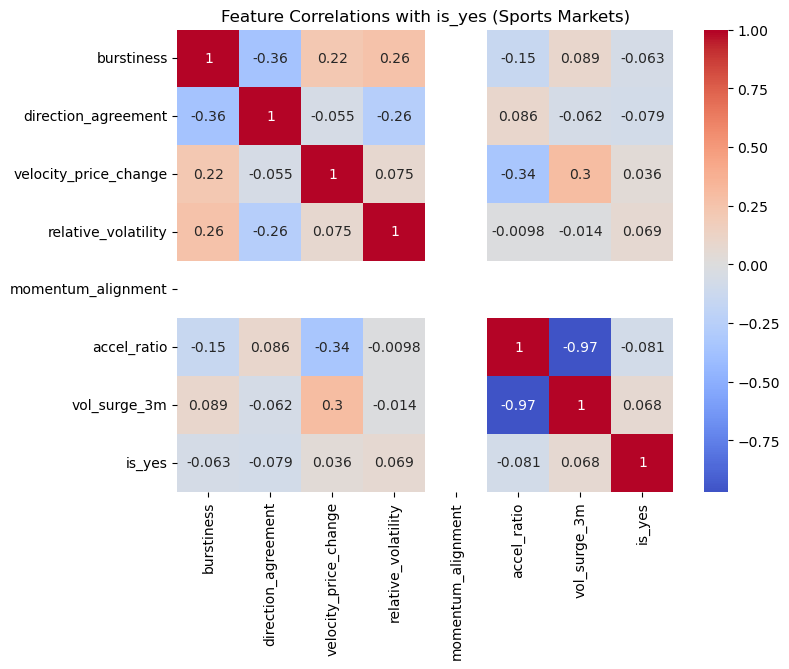

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick a few potentially meaningful features
features_to_check = [
    "burstiness",
    "direction_agreement",
    "velocity_price_change",
    "relative_volatility",
    "momentum_alignment",
    "accel_ratio",
    "vol_surge_3m",
]

# Compute correlations
corrs = df_sports[features_to_check + ["is_yes"]].corr()["is_yes"].sort_values(ascending=False)
print(corrs)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_sports[features_to_check + ["is_yes"]].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlations with is_yes (Sports Markets)")
plt.show()


In [16]:
# Check if is_yes is still accidentally in the feature set
print("is_yes" in feature_cols)
print(feature_cols)


False
['late_volume_ratio', 'abs_price_jump', 'price_std_1h', 'vol_total', 'vol_5m', 'vol_10m', 'vol_30m', 'vol_1h', 'price_change_5m', 'price_change_10m', 'price_change_30m', 'last_minute_ratio', 'burstiness', 'velocity_price_change', 'direction_agreement', 'relative_volatility', 'momentum_alignment', 'inter_dir_burst', 'inter_dir_last', 'vol_1m', 'vol_3m', 'price_change_1m', 'price_change_3m', 'ratio_vol_1m_30m', 'ratio_vol_3m_30m', 'accel_ratio', 'price_momentum_diff', 'burstiness_dev', 'vol_surge_3m', 'price_vol_1m_interaction']


price_change_30m     2.577347
vol_total            0.817177
price_change_10m     0.475261
last_minute_ratio    0.389867
ratio_vol_3m_30m     0.351585
ratio_vol_1m_30m     0.338399
vol_30m              0.321184
late_volume_ratio    0.309882
accel_ratio          0.303093
vol_1h               0.268483
dtype: float64


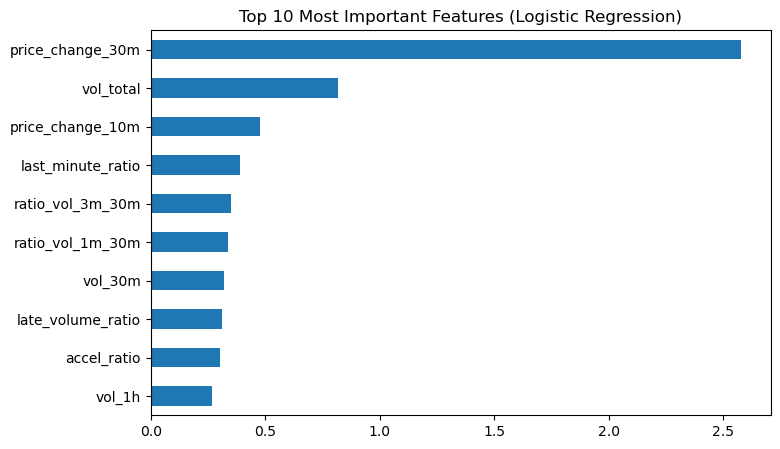

In [17]:
import numpy as np

# Get feature importances (absolute value of coefficients)
importance = np.abs(log_reg.coef_[0])
feature_importance = pd.Series(importance, index=feature_cols).sort_values(ascending=False)

# Display top features
print(feature_importance.head(10))

# Plot
plt.figure(figsize=(8,5))
feature_importance.head(10).plot(kind="barh")
plt.title("Top 10 Most Important Features (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()


In [18]:
# Try dropping the strongest predictors to test robustness
drop_test = ["price_change_30m", "vol_total"]

X = df_sports[[c for c in feature_cols if c not in drop_test]]
y = df_sports["is_yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)

print(f"AUC: {auc:.3f}")
print(f"Accuracy: {acc:.3f}")


AUC: 0.685
Accuracy: 0.613


In [19]:
# Create interaction and nonlinear features
df_sports["momentum_volatility_interaction"] = (
    df_sports["momentum_alignment"] * df_sports["relative_volatility"]
)
df_sports["burstiness_velocity_interaction"] = (
    df_sports["burstiness"] * df_sports["velocity_price_change"]
)

# Rebuild feature set
extra_features = ["momentum_volatility_interaction", "burstiness_velocity_interaction"]
new_feature_cols = [c for c in feature_cols if c not in ["price_change_30m", "vol_total"]] + extra_features

# Split, scale, and train again
X = df_sports[new_feature_cols]
y = df_sports["is_yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)

print(f"AUC: {auc:.3f}")
print(f"Accuracy: {acc:.3f}")


AUC: 0.685
Accuracy: 0.613


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 5, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],  # supports both L1 and L2
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
)
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)

print("Best Params:", grid.best_params_)
print(f"AUC: {auc:.3f}")
print(f"Accuracy: {acc:.3f}")


Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
AUC: 0.703
Accuracy: 0.600


In [21]:
coef_series = pd.Series(best_model.coef_[0], index=new_feature_cols)
nonzero = coef_series[coef_series != 0].sort_values(key=abs, ascending=False)

print("Non-zero coefficients under L1 regularization:")
print(nonzero)


Non-zero coefficients under L1 regularization:
price_change_10m                  -20.860577
ratio_vol_1m_30m                    2.405796
burstiness_velocity_interaction    -1.725387
inter_dir_last                     -0.570341
last_minute_ratio                  -0.525457
vol_30m                            -0.518654
ratio_vol_3m_30m                    0.387737
vol_surge_3m                        0.340623
late_volume_ratio                  -0.312647
price_std_1h                       -0.237344
relative_volatility                 0.226722
direction_agreement                 0.153691
inter_dir_burst                    -0.137032
burstiness                          0.081973
burstiness_dev                      0.064767
vol_1h                             -0.009341
abs_price_jump                      0.007442
dtype: float64


In [ ]:
#BACKTESTINGGGG

In [22]:
from pathlib import Path
import os
import numpy as np
import pandas as pd

# Same path setup as in backtesting.ipynb
BASE_DIR = Path("..").resolve()
DATA_DIR = BASE_DIR / "data"
TRADES_DIR = BASE_DIR / "kalshi_fetcher" / "data" / "enriched_trades"

print("DATA_DIR:", DATA_DIR)
print("TRADES_DIR:", TRADES_DIR)

# 1) Load enriched_markets so we can get event_time
enriched_path = DATA_DIR / "enriched_markets.csv"
enriched_df = pd.read_csv(enriched_path)

EVENT_TIME_COL = "event_time"

# Merge event_time into df_sports (your Sports slice of combined_v4)
df_sports = df_sports.merge(
    enriched_df[["ticker", EVENT_TIME_COL]],
    on="ticker",
    how="left"
)

# 2) Helper: last trade price before event_time → market-implied P(YES)
def get_market_prob_from_trades(row, event_time_col=EVENT_TIME_COL):
    ticker = row["ticker"]
    event_time = pd.to_datetime(row[event_time_col], utc=True)

    path = TRADES_DIR / f"{ticker}.csv"
    if not path.exists():
        return np.nan

    df_tr = pd.read_csv(path)
    if df_tr.empty:
        return np.nan

    # Only trades before the event resolves
    df_tr["created_time"] = pd.to_datetime(df_tr["created_time"], utc=True)
    df_pre = df_tr[df_tr["created_time"] <= event_time]
    if df_pre.empty:
        return np.nan

    # Try a few possible price column names
    price_cols = ["yes_price", "price_yes", "last_yes_price", "mid_price"]
    price_col = None
    for cand in price_cols:
        if cand in df_pre.columns:
            price_col = cand
            break
    if price_col is None:
        return np.nan

    # Last trade before event_time
    last_price = df_pre.sort_values("created_time")[price_col].iloc[-1]

    # Convert 0–100 style prices to 0–1 probabilities if needed
    if last_price > 1.0:
        last_price = last_price / 100.0

    return float(last_price)

# Apply to all Sports markets
df_sports["market_prob"] = df_sports.apply(get_market_prob_from_trades, axis=1)

# Quick sanity check
print(df_sports[["ticker", "market_prob"]].head())
print("Fraction missing market_prob:", df_sports["market_prob"].isna().mean())


DATA_DIR: C:\Users\Adam Nhan\prediction-market-money-printer\data
TRADES_DIR: C:\Users\Adam Nhan\prediction-market-money-printer\kalshi_fetcher\data\enriched_trades


C:\Users\Adam Nhan\AppData\Local\Temp\ipykernel_19204\1767974236.py:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_tr["created_time"] = pd.to_datetime(df_tr["created_time"], utc=True)


                            ticker  market_prob
0  KXNCAAMBTOTAL-25NOV08PVWICH-152          NaN
1  KXNCAAMBTOTAL-25NOV08PVWICH-149          NaN
2  KXNCAAMBTOTAL-25NOV08PVWICH-146          NaN
3  KXNCAAMBTOTAL-25NOV08PVWICH-143          NaN
4  KXNCAAMBTOTAL-25NOV08PVWICH-140          NaN
Fraction missing market_prob: 1.0


In [23]:
from pathlib import Path
import pandas as pd
import numpy as np

# Take a sample sports market
sample_ticker = df_sports["ticker"].iloc[0]
print("Sample ticker:", sample_ticker)

print("\nDoes event_time exist for this ticker?")
print(df_sports.loc[df_sports["ticker"] == sample_ticker, ["ticker", "event_time"]])

# Check the trades file path
TRADES_DIR = (Path("..") / "kalshi_fetcher" / "data" / "enriched_trades").resolve()
trades_path = TRADES_DIR / f"{sample_ticker}.csv"
print("\nTrades path:", trades_path)
print("File exists:", trades_path.exists())

if trades_path.exists():
    df_tr = pd.read_csv(trades_path)
    print("\nTrades columns:", df_tr.columns.tolist())
    print(df_tr.head())


Sample ticker: KXNCAAMBTOTAL-25NOV08PVWICH-152

Does event_time exist for this ticker?
                            ticker                   event_time
0  KXNCAAMBTOTAL-25NOV08PVWICH-152  2025-11-09T02:29:48.573824Z

Trades path: C:\Users\Adam Nhan\prediction-market-money-printer\kalshi_fetcher\data\enriched_trades\KXNCAAMBTOTAL-25NOV08PVWICH-152.csv
File exists: True

Trades columns: ['ticker', 'created_time', 'price', 'count', 'taker_side', 'trade_id', 'event_ticker', 'category', 'event_time', 'created_time_dt', 'event_time_dt', 'seconds_before_event', 'minutes_before_event']
                            ticker                 created_time  price  count  \
0  KXNCAAMBTOTAL-25NOV08PVWICH-152  2025-11-09T01:50:24.600575Z   0.99    200   

  taker_side                              trade_id  \
0        yes  338b6645-e919-6c0c-fd09-35aa7f1da8f1   

                  event_ticker category                   event_time  \
0  KXNCAAMBTOTAL-25NOV08PVWICH   Sports  2025-11-09T02:29:48.573824Z   


In [24]:
from pathlib import Path
import numpy as np
import pandas as pd

BASE_DIR = Path("..").resolve()
TRADES_DIR = BASE_DIR / "kalshi_fetcher" / "data" / "enriched_trades"

def get_market_prob_from_trades(row, event_time_col="event_time"):
    ticker = row["ticker"]
    event_time = pd.to_datetime(row[event_time_col], utc=True)

    path = TRADES_DIR / f"{ticker}.csv"
    if not path.exists():
        return np.nan

    df_tr = pd.read_csv(path)
    if df_tr.empty:
        return np.nan

    # Use created_time_dt if available (already parsed), else parse created_time
    if "created_time_dt" in df_tr.columns:
        df_tr["created_time_dt"] = pd.to_datetime(df_tr["created_time_dt"], utc=True)
        time_col = "created_time_dt"
    else:
        df_tr["created_time"] = pd.to_datetime(df_tr["created_time"], utc=True)
        time_col = "created_time"

    # Only trades before the event resolves
    df_pre = df_tr[df_tr[time_col] <= event_time]
    if df_pre.empty:
        return np.nan

    # Price column – in your files it's just 'price'
    price_cols = ["price", "yes_price", "price_yes", "last_yes_price", "mid_price"]
    price_col = None
    for cand in price_cols:
        if cand in df_pre.columns:
            price_col = cand
            break
    if price_col is None:
        return np.nan

    # Last trade before event_time
    df_pre_sorted = df_pre.sort_values(time_col)
    last_price = df_pre_sorted[price_col].iloc[-1]

    # Convert 0–100 to 0–1 if needed
    if last_price > 1.0:
        last_price = last_price / 100.0

    return float(last_price)

# Recompute market_prob
df_sports["market_prob"] = df_sports.apply(get_market_prob_from_trades, axis=1)

print(df_sports[["ticker", "market_prob"]].head())
print("Fraction missing market_prob:", df_sports["market_prob"].isna().mean())


C:\Users\Adam Nhan\AppData\Local\Temp\ipykernel_19204\2820164022.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_tr["created_time_dt"] = pd.to_datetime(df_tr["created_time_dt"], utc=True)


                            ticker  market_prob
0  KXNCAAMBTOTAL-25NOV08PVWICH-152         0.99
1  KXNCAAMBTOTAL-25NOV08PVWICH-149         0.99
2  KXNCAAMBTOTAL-25NOV08PVWICH-146         0.99
3  KXNCAAMBTOTAL-25NOV08PVWICH-143         0.99
4  KXNCAAMBTOTAL-25NOV08PVWICH-140         0.99
Fraction missing market_prob: 0.0


In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np
import pandas as pd

# 1) Clean index so it matches row positions
df_sports = df_sports.reset_index(drop=True)

target = "is_yes"

# We already decided on new_feature_cols earlier:
#   - based on feature_cols
#   - with price_change_30m and vol_total dropped
#   - plus the two interaction features
# If for some reason new_feature_cols is missing, uncomment and rebuild:
# feature_cols = [c for c in df_sports.columns 
#                 if c not in ["ticker", "category", "event_ticker", target, "yes_flow_ratio"]]
# extra_features = ["momentum_volatility_interaction", "burstiness_velocity_interaction"]
# new_feature_cols = [c for c in feature_cols if c not in ["price_change_30m", "vol_total"]] + extra_features

X = df_sports[new_feature_cols]
y = df_sports[target]

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4) Refit tuned L1 logistic regression with GridSearch
param_grid = {
    "C": [0.01, 0.1, 1, 5, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
)

grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_

# 5) Quick sanity check
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred = best_model.predict(X_test_scaled)

auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)

print("Best Params:", grid.best_params_)
print(f"AUC: {auc:.3f}")
print(f"Accuracy: {acc:.3f}")
print("X_test index range:", X_test.index.min(), "→", X_test.index.max())
print("df_sports index range:", df_sports.index.min(), "→", df_sports.index.max())


Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
AUC: 0.703
Accuracy: 0.613
X_test index range: 1 → 395
df_sports index range: 0 → 395


In [29]:
import numpy as np
import pandas as pd

# 1) Get the indices of the test set
test_idx = X_test.index

# 2) Build a test DataFrame with outcome + market probs
test_df = df_sports.loc[test_idx].copy()

# 3) Recompute model probabilities on the test set (using the tuned model)
X_test_for_pred = df_sports.loc[test_idx, new_feature_cols]
X_test_scaled_for_pred = scaler.transform(X_test_for_pred)
test_df["model_p_yes"] = best_model.predict_proba(X_test_scaled_for_pred)[:, 1]

# 4) Trading rule:
#    - Buy YES if model_p_yes > market_prob + threshold
#    - Buy NO  if model_p_yes < market_prob - threshold
#    - Otherwise, no trade
def trade_pnl(row, threshold=0.05):
    p_model = row["model_p_yes"]
    p_mkt = row["market_prob"]
    y = row["is_yes"]  # 1 if YES resolved, 0 if NO

    if np.isnan(p_mkt):
        return 0.0, 0  # no trade

    # Buy YES
    if p_model > p_mkt + threshold:
        pnl = y - p_mkt          # pay p_mkt, get 1 if YES
        traded = 1
    # Buy NO
    elif p_model < p_mkt - threshold:
        pnl = p_mkt - y          # pay (1-p_mkt), get 1 if NO
        traded = 1
    else:
        pnl = 0.0
        traded = 0

    return pnl, traded

threshold = 0.01  # 5 percentage point edge
test_df[["pnl", "traded"]] = test_df.apply(
    lambda r: pd.Series(trade_pnl(r, threshold), index=["pnl", "traded"]),
    axis=1
)

# 5) Summary stats
trade_mask = test_df["traded"] == 1
total_trades = trade_mask.sum()
total_pnl = test_df.loc[trade_mask, "pnl"].sum()
avg_pnl_per_trade = total_pnl / total_trades if total_trades > 0 else np.nan
hit_rate = (test_df.loc[trade_mask, "pnl"] > 0).mean() if total_trades > 0 else np.nan

print(f"Threshold: {threshold}")
print(f"Total trades: {total_trades}")
print(f"Total PnL: {total_pnl:.3f}")
print(f"Avg PnL per trade: {avg_pnl_per_trade:.4f}")
print(f"Hit rate: {hit_rate:.3f}")


Threshold: 0.01
Total trades: 73
Total PnL: -1.200
Avg PnL per trade: -0.0164
Hit rate: 0.014


In [30]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np
import pandas as pd

# 1) Calibrated classifier on top of tuned logistic
base_lr = LogisticRegression(**grid.best_params_, max_iter=1000)
calib_clf = CalibratedClassifierCV(base_lr, method="isotonic", cv=5)
calib_clf.fit(X_train_scaled, y_train)

# 2) Check calibrated AUC/accuracy
y_prob_cal = calib_clf.predict_proba(X_test_scaled)[:, 1]
y_pred_cal = (y_prob_cal >= 0.5).astype(int)

auc_cal = roc_auc_score(y_test, y_prob_cal)
acc_cal = accuracy_score(y_test, y_pred_cal)
print(f"Calibrated AUC: {auc_cal:.3f}")
print(f"Calibrated Accuracy: {acc_cal:.3f}")

# 3) Build test_df again
test_idx = X_test.index
test_df = df_sports.loc[test_idx].copy()

# Use calibrated probabilities as model_p_yes
test_df["model_p_yes"] = y_prob_cal

# 4) Same trading rule as before
def trade_pnl(row, threshold=0.05):
    p_model = row["model_p_yes"]
    p_mkt = row["market_prob"]
    y = row["is_yes"]  # 1 if YES, 0 if NO

    if np.isnan(p_mkt):
        return 0.0, 0

    if p_model > p_mkt + threshold:
        pnl = y - p_mkt          # buy YES
        traded = 1
    elif p_model < p_mkt - threshold:
        pnl = p_mkt - y          # buy NO
        traded = 1
    else:
        pnl = 0.0
        traded = 0

    return pnl, traded

threshold = 0.05
test_df[["pnl", "traded"]] = test_df.apply(
    lambda r: pd.Series(trade_pnl(r, threshold), index=["pnl", "traded"]),
    axis=1
)

trade_mask = test_df["traded"] == 1
total_trades = trade_mask.sum()
total_pnl = test_df.loc[trade_mask, "pnl"].sum()
avg_pnl_per_trade = total_pnl / total_trades if total_trades > 0 else np.nan
hit_rate = (test_df.loc[trade_mask, "pnl"] > 0).mean() if total_trades > 0 else np.nan

print(f"\nThreshold: {threshold}")
print(f"Total trades: {total_trades}")
print(f"Total PnL: {total_pnl:.3f}")
print(f"Avg PnL per trade: {avg_pnl_per_trade:.4f}")
print(f"Hit rate: {hit_rate:.3f}")


Calibrated AUC: 0.701
Calibrated Accuracy: 0.613

Threshold: 0.05
Total trades: 76
Total PnL: -1.230
Avg PnL per trade: -0.0162
Hit rate: 0.013


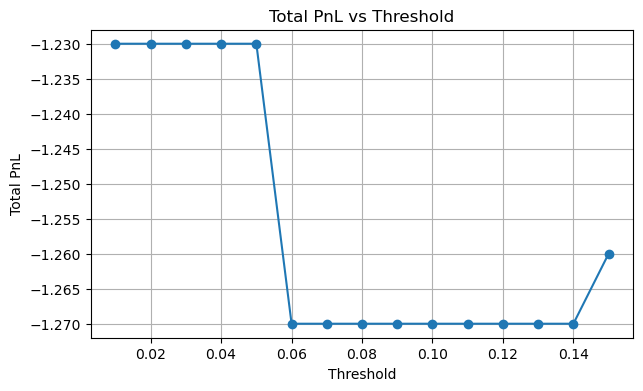

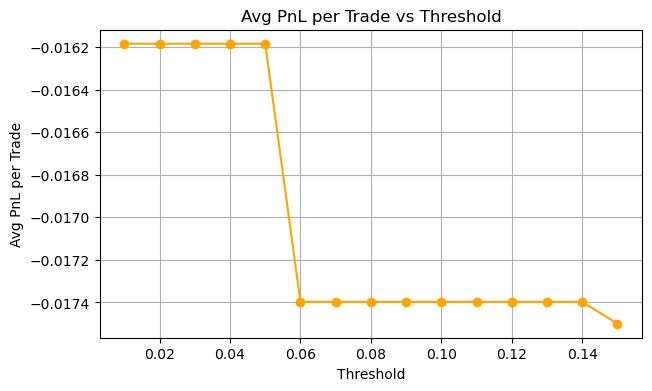

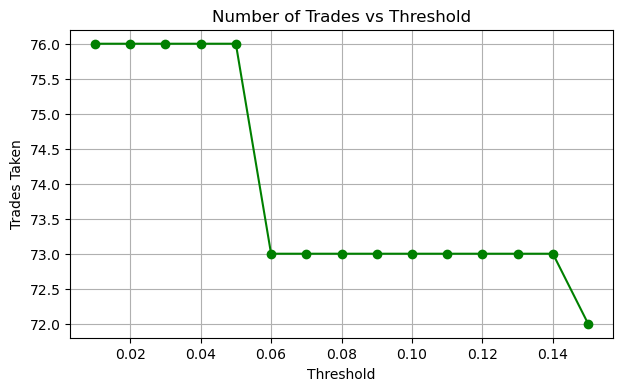

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def backtest_threshold(threshold):
    test_df = df_sports.loc[X_test.index].copy()
    test_df["model_p_yes"] = calib_clf.predict_proba(X_test_scaled)[:, 1]
    test_df["market_prob"] = df_sports.loc[X_test.index, "market_prob"]
    test_df["is_yes"] = y_test.values

    def trade_pnl(row):
        p_model = row["model_p_yes"]
        p_mkt = row["market_prob"]
        y = row["is_yes"]

        if np.isnan(p_mkt):
            return 0.0, 0

        if p_model > p_mkt + threshold:
            pnl = y - p_mkt
            traded = 1
        elif p_model < p_mkt - threshold:
            pnl = p_mkt - y
            traded = 1
        else:
            pnl = 0.0
            traded = 0
        return pnl, traded

    test_df[["pnl", "traded"]] = test_df.apply(
        lambda r: pd.Series(trade_pnl(r), index=["pnl", "traded"]),
        axis=1
    )
    trade_mask = test_df["traded"] == 1
    total_trades = trade_mask.sum()
    total_pnl = test_df.loc[trade_mask, "pnl"].sum()
    avg_pnl_per_trade = total_pnl / total_trades if total_trades > 0 else np.nan
    return total_pnl, avg_pnl_per_trade, total_trades

thresholds = np.arange(0.01, 0.16, 0.01)
pnls, avg_pnls, trades = zip(*[backtest_threshold(t) for t in thresholds])

plt.figure(figsize=(7,4))
plt.plot(thresholds, pnls, marker='o')
plt.title("Total PnL vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Total PnL")
plt.grid(True)
plt.show()

plt.figure(figsize=(7,4))
plt.plot(thresholds, avg_pnls, marker='o', color='orange')
plt.title("Avg PnL per Trade vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Avg PnL per Trade")
plt.grid(True)
plt.show()

plt.figure(figsize=(7,4))
plt.plot(thresholds, trades, marker='o', color='green')
plt.title("Number of Trades vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Trades Taken")
plt.grid(True)
plt.show()
